# Projekt z przedmiotu Podstawy Reprezentacji i Analizy Danych

### Temat Projektu - Twitter

## Część pierwsza - Eksploracyjna Analiza Danych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format

import re

## Wczytanie i czyszczenie danych

In [2]:
df = pd.read_csv("gender-classifier-DFE-791531.csv", encoding = "latin1", engine='python', usecols=[5, 6, 10, 11, 13, 14, 17, 18, 19, 21])
df.head()

,gender,gender:confidence,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
0,male,1.00,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.00,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,0.66,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,1,C0DEED,i absolutely adore when louis starts the songs...,5617
3,male,1.00,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.00,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...,31462


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 10 columns):
gender               19953 non-null object
gender:confidence    20024 non-null float64
description          16306 non-null object
fav_number           20050 non-null int64
link_color           20050 non-null object
name                 20050 non-null object
retweet_count        20050 non-null int64
sidebar_color        20050 non-null object
text                 20050 non-null object
tweet_count          20050 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.5+ MB


In [4]:
(df.isna()
 .sum(axis=0))

gender                 97
gender:confidence      26
description          3744
fav_number              0
link_color              0
name                    0
retweet_count           0
sidebar_color           0
text                    0
tweet_count             0
dtype: int64

In [5]:
df.keys()

Index(['gender', 'gender:confidence', 'description', 'fav_number',
       'link_color', 'name', 'retweet_count', 'sidebar_color', 'text',
       'tweet_count'],
      dtype='object')

## TODO Zmiana dziwnych znaków na emoji

In [6]:
str(df.loc[1, ['text']])

'text    \x89ÛÏIt felt like they were my friends and I was...\nName: 1, dtype: object'

Usunięcie rekordów z pewnością płci mniejszą niż 0.85 lub płcią nieznaną

In [7]:
df = df.where((df['gender:confidence'] > 0.9) & (df['gender'] != 'unknown')).dropna()
df.head()

,gender,gender:confidence,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
0,male,1.00,i sing my own rhythm.,0.00,08C2C2,sheezy0,0.00,FFFFFF,Robbie E Responds To Critics After Win Against...,110964.00
1,male,1.00,I'm the author of novels filled with family dr...,68.00,0084B4,DavdBurnett,0.00,C0DEED,ÛÏIt felt like they were my friends and I was...,7471.00
3,male,1.00,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202.00,0084B4,douggarland,0.00,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693.00
4,female,1.00,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318.00,3B94D9,WilfordGemma,0.00,0,Watching Neighbours on Sky+ catching up with t...,31462.00
5,female,1.00,you don't know me.,3901.00,F5ABB5,monroevicious,0.00,0,"Ive seen people on the train with lamps, chair...",20036.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11779 entries, 0 to 20049
Data columns (total 10 columns):
gender               11779 non-null object
gender:confidence    11779 non-null float64
description          11779 non-null object
fav_number           11779 non-null float64
link_color           11779 non-null object
name                 11779 non-null object
retweet_count        11779 non-null float64
sidebar_color        11779 non-null object
text                 11779 non-null object
tweet_count          11779 non-null float64
dtypes: float64(4), object(6)
memory usage: 1012.3+ KB


In [9]:
df = df.drop(columns=['gender:confidence'])

In [10]:
def hexToRGB(color):
    if color == '0':
        return 255, 255, 255
    if len(color)<5:
        return 255, 255, 255
    try:
        color = color.replace(".", "")
        color = color.replace("+", "")
        r=int(color[0:2],16)
        g=int(color[2:4],16)
        b=int(color[4:6],16)
    except (RuntimeError, TypeError, NameError, ValueError):
        return None, None, None
    else:
        return r,g,b
    

Dodanie kolumn z wartościami RGB kolorów w kolumnach link_color i sidebar_color

In [11]:
#print("Zmeniam kolory z postaci #RRGGBB w wersji hex na (rr,gg,bb) w wersji dec")
df["link_color_R"] = df["link_color"].apply(lambda x: hexToRGB(str(x))[0])
df["link_color_G"] = df["link_color"].apply(lambda x: hexToRGB(str(x))[1])
df["link_color_B"] = df["link_color"].apply(lambda x: hexToRGB(str(x))[2])
df["sidebar_color_R"] = df["sidebar_color"].apply(lambda x: hexToRGB(str(x))[0])
df["sidebar_color_G"] = df["sidebar_color"].apply(lambda x: hexToRGB(str(x))[1])
df["sidebar_color_B"] = df["sidebar_color"].apply(lambda x: hexToRGB(str(x))[2])

df = df.dropna()
df.loc[:, ['link_color', 'sidebar_color', 'link_color_R', 'link_color_G', 'link_color_B', 'sidebar_color_R', 'sidebar_color_G', 'sidebar_color_B']].head()

,link_color,sidebar_color,link_color_R,link_color_G,link_color_B,sidebar_color_R,sidebar_color_G,sidebar_color_B
0,08C2C2,FFFFFF,8.00,194.00,194.00,255,255,255
1,0084B4,C0DEED,0.00,132.00,180.00,192,222,237
3,0084B4,C0DEED,0.00,132.00,180.00,192,222,237
4,3B94D9,0,59.00,148.00,217.00,255,255,255
5,F5ABB5,0,245.00,171.00,181.00,255,255,255


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11778 entries, 0 to 20049
Data columns (total 15 columns):
gender             11778 non-null object
description        11778 non-null object
fav_number         11778 non-null float64
link_color         11778 non-null object
name               11778 non-null object
retweet_count      11778 non-null float64
sidebar_color      11778 non-null object
text               11778 non-null object
tweet_count        11778 non-null float64
link_color_R       11778 non-null float64
link_color_G       11778 non-null float64
link_color_B       11778 non-null float64
sidebar_color_R    11778 non-null int64
sidebar_color_G    11778 non-null int64
sidebar_color_B    11778 non-null int64
dtypes: float64(6), int64(3), object(6)
memory usage: 1.4+ MB


['0084B4' '000000' '3B94D9' '2FC2EF' 'DD2E44' 'ABB8C2' '000000' '4A913C'
 '0099B9' 'FA743E']


C:\Users\Piotr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


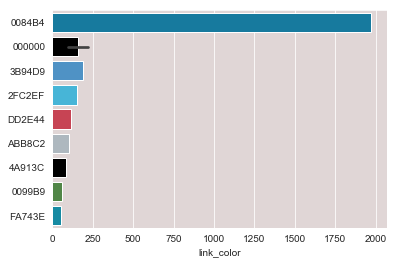

In [13]:
male_top_link_color = df[df['gender'] == 'male']['link_color'].value_counts().head(10)
male_top_link_color_idx = male_top_link_color.index
male_top_color = male_top_link_color_idx.values

male_top_color[1] = '000000'
male_top_color[6] = '000000'
print (male_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
sns.barplot (x = male_top_link_color, y = male_top_color , palette=list(map(l, male_top_color)))

['0084B4' '9266CC' 'F5ABB5' 'DD2E44' 'FF0000' '3B94D9' 'ABB8C2' '000001'
 '000000' 'B40B43']


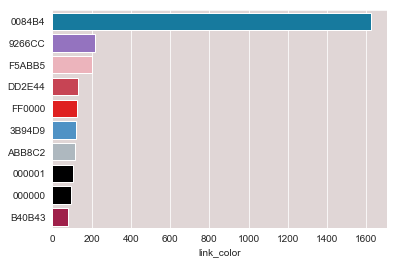

In [14]:
female_top_link_color = df[df['gender'] == 'female']['link_color'].value_counts().head(10)
female_top_link_color_idx = female_top_link_color.index
female_top_color = female_top_link_color_idx.values

female_top_color[7] = '000001'
female_top_color[8] = '000000'
print (female_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
sns.barplot (x = female_top_link_color, y = female_top_color , palette=list(map(l, female_top_color)))

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC' 'BDDCAD'
 '65B0DA' 'C6E2EE']


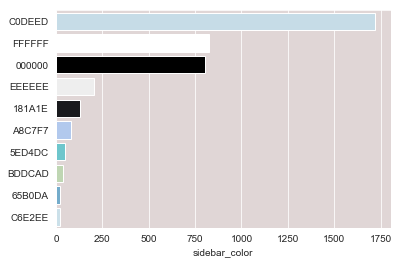

In [15]:
male_top_sidebar_color = df[df['gender'] == 'male']['sidebar_color'].value_counts().head(10)
male_top_sidebar_color_idx = male_top_sidebar_color.index
male_top_color = male_top_sidebar_color_idx.values

male_top_color[2] = '000000'
print (male_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
sns.barplot (x = male_top_sidebar_color, y = male_top_color , palette=list(map(l, male_top_color)))

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '65B0DA' '5ED4DC' '181A1E' 'CC3366'
 '829D5E' 'DBE9ED']


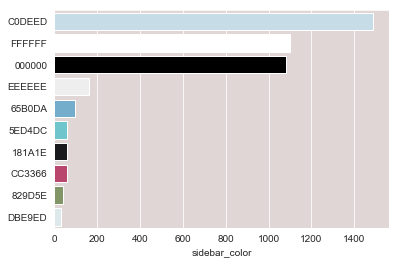

In [16]:
female_top_sidebar_color = df[df['gender'] == 'female']['sidebar_color'].value_counts().head(10)
female_top_sidebar_color_idx = female_top_sidebar_color.index
female_top_color = female_top_sidebar_color_idx.values

female_top_color[2] = '000000'
print (female_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
plot4 =sns.barplot (x = female_top_sidebar_color, y = female_top_color, palette=list(map(l, female_top_color)))
sns.set_style("darkgrid", {"axes.facecolor": "#FFFFFF"})

## Retweet_count, Fav_number i Tweet_count w zależności od płci

In [17]:
gfn_mean = (df.loc[:, ['gender', 'fav_number']]
            .groupby('gender')
            .mean()
            .sort_values(by='fav_number'))
gfn_mean

,fav_number
gender,
brand,2009.19
male,4801.83
female,6369.06


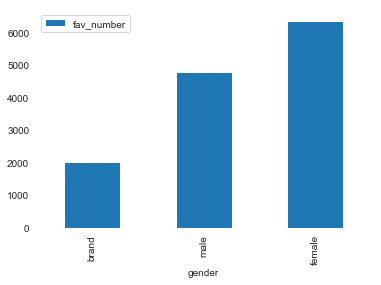

In [18]:
gfn_mean.plot.bar()

In [19]:
gtc_mean = (df.loc[:, ['gender', 'tweet_count']]
            .groupby('gender')
            .mean()
            .sort_values(by='tweet_count'))
gtc_mean

,tweet_count
gender,
female,26065.72
male,31268.01
brand,70313.51


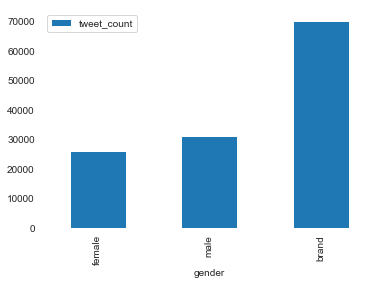

In [20]:
gtc_mean.plot.bar()

In [21]:
grc_mean = (df.loc[:, ['gender', 'retweet_count']]
            .groupby('gender')
            .mean()
            .sort_values(by='retweet_count'))
grc_mean

,retweet_count
gender,
female,0.03
brand,0.09
male,0.12


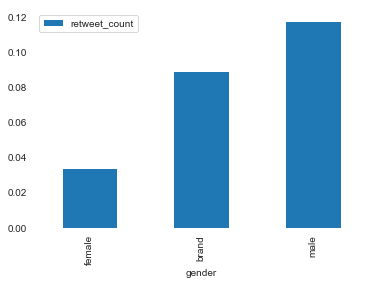

In [22]:
grc_mean.plot.bar()

In [23]:
(df.loc[:, 'link_color']
         .value_counts()
         #.groupby('link_color')
         #   
         #.sort_values(by='gender', ascending=False)
         .head(10)
        )


0084B4    4948
9999       428
3B94D9     412
DD2E44     308
9266CC     299
4A913C     264
ABB8C2     263
2FC2EF     251
0          248
F5ABB5     225
Name: link_color, dtype: int64

# Usuwanie znaków specjalnych z tekstu i opisu

Funckja usuwająca znaki spoza systemu ASCII, linki, znaki specjalne oraz podwójne spacje

In [24]:
def normalize_text(text):
    text = text.lower()
    
    # Usuń znaki spoza ASCII
    text = re.sub('[^\x00-\x7F]+',' ', text)
    
    # Usuń linki
    text = re.sub('https?:\/\/.*[\r\n] ', ' ', text)
    
    # Usuń znaki specjalne
    text = re.sub('[?!+%{}:;.,#"\'()\[\]_#\&-]', '',text) #@&-
    
    # Usuń podwójne spacje
    text = re.sub('\s+',' ',text)
    
    return text

W orginalnej tabeli zostają stworzone trzy dodatkowe kolumny. Jedna ('tekst_norm') jest znormalizowanym tekstem tweeta, druga ('description_norm') jest znormalizowanym opisem oraz trzecia ('all_text') jest połączeniem znormalizowanych tekstu i opisu.

In [25]:
df['text_norm'] = [normalize_text(text) for text in df['text']]
df['description_norm'] = [normalize_text(text) for text in df['description']]
df['all_text'] = df['text_norm'].str.cat(df['description_norm'],sep=' ')

df = df.reset_index(drop=True)

# Wizualizacja najczęściej używanych słów ze względu na płeć

Funckja tworząca wykresy najczęściej użytych słów dla płci oraz dla wybranego tekstu. 

In [26]:
# Za pierwszym razem trzeba uruchomić to w komentarzu niżej
# import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
import collections

def plot_common_words(gender, text_name):
    X = df[df['gender'] == gender][[text_name]]
    X.columns=['Text']
    text = X['Text'].tolist()

    tokens = []

    for item in text:
        tokens.append(word_tokenize(item))

    words = []

    for item in tokens:
        words = words + item

    counter = dict(collections.Counter(words))
    counter_df = pd.DataFrame.from_dict(counter, orient='index').reset_index().rename(columns={'index':'word', 0:'count'})
    counter_df = counter_df.sort_values(by=['count'], ascending=False).head(10)
    
    plt.figure(figsize=(14, 7))
    plt.barh(counter_df['word'], counter_df['count'])
    plt.title('Most used words by ' + gender + 's for ' + text_name)
    plt.xlabel('frequency')
    plt.ylabel('words')
    plt.show()

Użycie funkcji, dla wszystkich płci, dla połączonego tekstu tweeta i opisu.

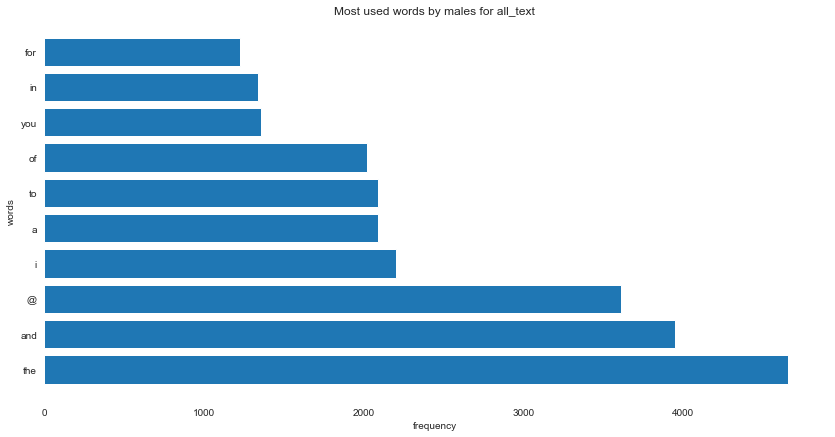

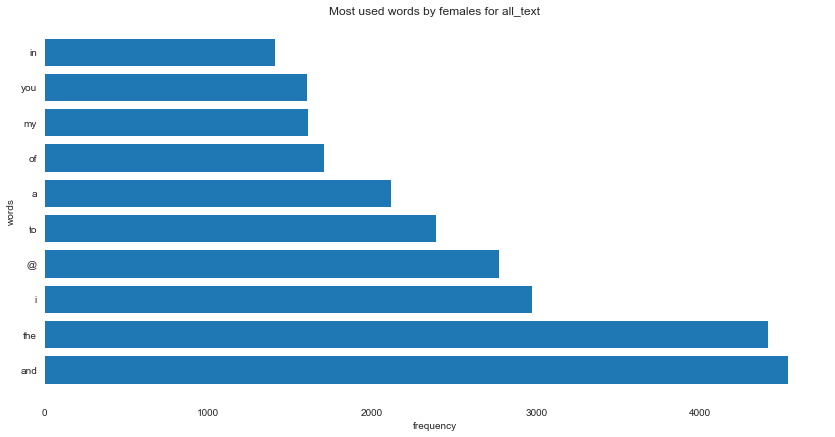

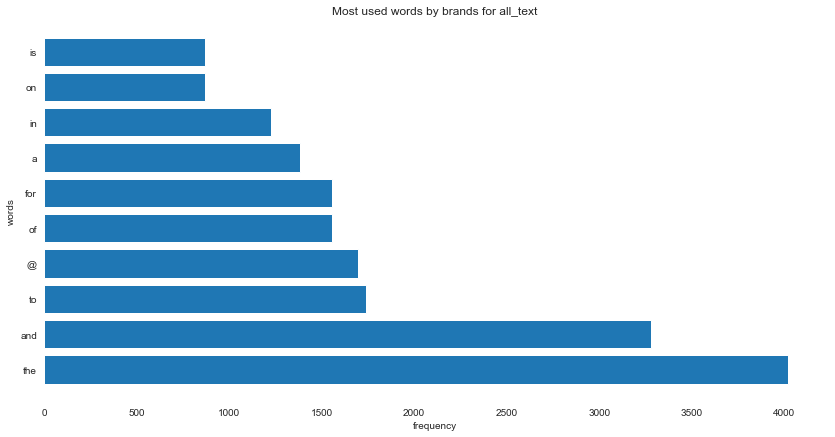

In [27]:
# to chwilę trwa
plot_common_words('male', 'all_text')
plot_common_words('female', 'all_text')
plot_common_words('brand', 'all_text')

# Przewidywanie płci

Funkcja wykorzystująca __naiwny klasyfikator bayesowski__, przewidująca jakiej płci jest użytkownik, na podstawie wybranego tekstu.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

def predict_for_set(data_set, text):
    X = data_set[[text]]
    y = data_set[['gender']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    count_vect = CountVectorizer()
    X_train_vect = count_vect.fit_transform(X_train.iloc[:, 0])
    X_test_vect = count_vect.transform(X_test.iloc[:, 0])

    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_vect)
    X_test_tfidf = tfidf_transformer.fit_transform(X_test_vect)

    alg = MultinomialNB().fit(X_train_tfidf, y_train)

    y_pred = alg.predict(X_test_tfidf)
    
    print(metrics.accuracy_score(y_test, y_pred))

Przewidywanie płci na podstawie tesktu tweeta

In [29]:
print('Prediction for text: ', end='')
a = predict_for_set(df, 'text_norm')


Prediction for text: 0.5055178268251274


C:\Users\Piotr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Przewidywanie płci na podstawie tekstu tweeta i opisu

In [30]:
print('Prediction for text and description combined: ', end='')
predict_for_set(df, 'all_text')

Prediction for text and description combined: 0.6362478777589134


C:\Users\Piotr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Przewidywanie płci na podstawie opisu

In [31]:
print('Prediction for description: ', end='')
predict_for_set(df, 'description_norm')

Prediction for description: 0.6905772495755518


C:\Users\Piotr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Jak widać najlepszy wynik uzyskaliśmy używając tylko opisu.